# Table of Contents 

Major Tasks in data preprocessing:
- Data cleaning
    - <font color=blue>Handling missing values (on HYPOTHYROID dataset)</font> ✅
    - Smooth noisy data
    - Identify or remove outliers
    - Resolve inconsistencies
    - Encoding categorical features 

- Data integration

- Data reduction
    - Dimensionality reduction
    - Numerosity reduction
        - Parametric methods
        - <font color=blue>Non parametric methods (on IRIS dataset)</font> ✅
            - <font color=blue>Sampling</font> ✅
                - <font color=blue>Simple random sampling with replacement</font> ✅
                - <font color=blue>Simple random sampling without replacement</font> ✅
        
- Data transformation and data discretization
    - Normalization
    - Concept Hierarchy Generation
    - <font color=blue>Discretization with pandas (on IRIS dataset)</font> ✅
        - <font color=blue>Equal width binning</font> ✅
        - <font color=blue>Equal frequency binning</font> ✅

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Data cleaning: handling missing value
Main strategies:
- **ignoring the tuple**
    - ⚠️ risk of shrinking the dataset too much. Problematic, for the downstream ML algorithm
- **filling missing value manually**
    - ⚠️ typically infeasible/tedious
- **imputing missing value (filling automatically)**
    - ⚠️ arbitrary

### The hypothyroid dataset

Thyroid disease records supplied by the Garavan Institute and J. Ross Quinlan, New South Wales Institute, Syndney, Australia.

Missing values are reported with symbol "?", in the original dataset

|column|values|
|---|---|
| age|continuous (int)|
| sex|M, F|
| on thyroxine|f, t|
| query on thyroxine|f, t|
| on antithyroid medication|f, t|
| sick|f, t|
| pregnant|f, t|
| thyroid surgery|f, t|
| I131 treatment|f, t|
| query hypothyroid|f, t|
| query hyperthyroid|f, t|
| lithium|f, t|
| goitre|f, t|
| tumor|		f, t|
| hypopituitary|			f, t|
| psych|				f, t|
| TSH measured|			f, t|
| TSH|		continuous|
| T3 measured|			f, t|
| T3|				continuous|
| TT4 measured|			f, t|
| TT4|	continuous|
| T4U measured|			f, t|
| T4U|	continuous|
| FTI measured|			f, t|
| FTI|	continuous|
| TBG measured|			f, t|
| TBG|				continuous|
| referral source|		WEST, STMW, SVHC, SVI, SVHD, other|
| Class| hypothyroid, primary hypothyroid, compensated hypothyroid, secondary hypothyroid, negative|

Load the hypothyroid dataset    

In [2]:
df = pd.read_csv('dataset/hypothyroid.csv', na_values="?")
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,negative


In [ ]:
df.head().T

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3771.0,51.735879,20.084958,1.000,36.00,54.00,67.00,455.00
TSH,3403.0,5.086766,24.521470,0.005,0.50,1.40,2.70,530.00
T3,3003.0,2.013500,0.827434,0.050,1.60,2.00,2.40,10.60
TT4,3541.0,108.319345,35.604248,2.000,88.00,103.00,124.00,430.00
T4U,3385.0,0.995000,0.195457,0.250,0.88,0.98,1.08,2.32
FTI,3387.0,110.469649,33.089698,2.000,93.00,107.00,124.00,395.00
TBG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(include = 'object').T

In [ ]:
df.isna().sum(axis=0)

Attribute removal:
- "*TBG*" column has only missing values - we can drop it
- "*TBG measured*" has only one unique value - we can drop it	

In [4]:
df = df.drop(['TBG','TBG measured'],axis = 1)
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,2.0,t,82.0,t,0.94,t,87.0,SVI,negative


<u>Handling missing values: **ignoring the tuple**</u>


In [7]:
df_notna = df.dropna(how='any')
print(df_notna.isna().sum())
df_notna

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
Class                        0
dtype: int64


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
7,80.0,F,f,f,f,f,f,f,f,f,...,t,0.6,t,80.0,t,0.70,t,115.0,SVI,negative
8,66.0,F,f,f,f,f,f,f,f,f,...,t,2.2,t,123.0,t,0.93,t,132.0,SVI,negative
9,68.0,M,f,f,f,f,f,f,f,f,...,t,1.6,t,83.0,t,0.89,t,93.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19.0,F,f,f,f,f,f,f,f,f,...,t,2.7,t,108.0,t,1.11,t,97.0,other,compensated_hypothyroid
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,2.0,t,82.0,t,0.94,t,87.0,SVI,negative


Notice that with this strategy we lost around 30% of the tuples

In [8]:
len(df_notna)/len(df)

0.7006892895015907

Variation of classes distribution.

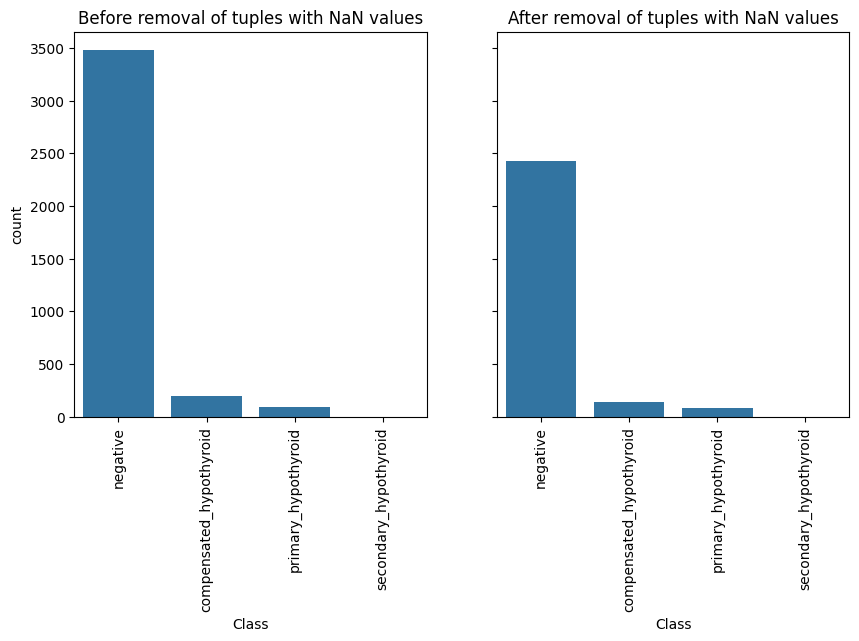

In [9]:
fig,axes = plt.subplots(1,2,figsize=(10,5),sharey = True)
sns.countplot(x='Class',data = df, ax = axes[0], order = df_notna['Class'].value_counts().index)
axes[0].tick_params(axis = 'x',labelrotation=90)
axes[0].set_title('Before removal of tuples with NaN values')
sns.countplot(x='Class',data = df_notna, ax = axes[1], order = df_notna['Class'].value_counts().index)
axes[1].tick_params(axis = 'x',labelrotation=90)
axes[1].set_title('After removal of tuples with NaN values')

plt.show()

Variation of attribute statistics, grouped by class.

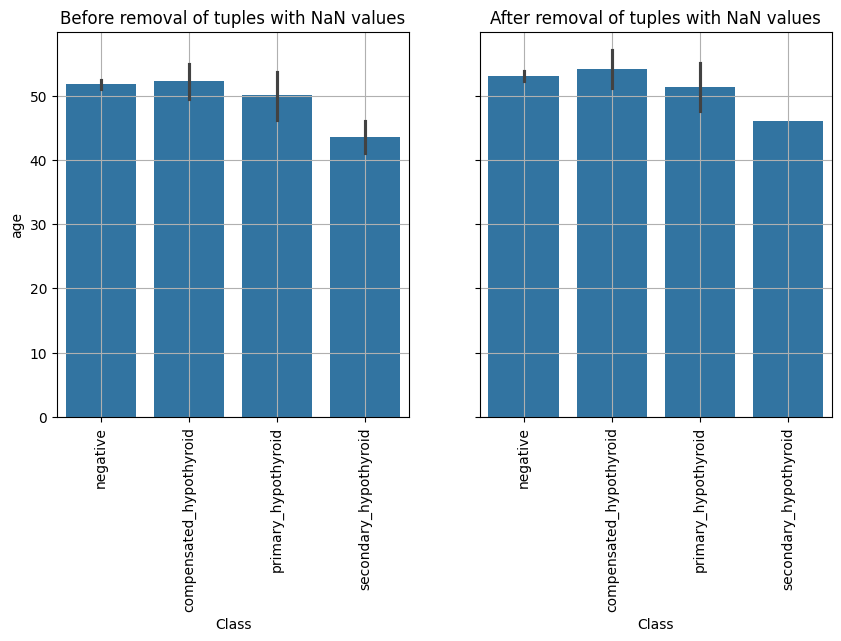

In [10]:
fig,axes = plt.subplots(1,2,figsize=(10,5),sharey = True)
sns.barplot(y = 'age',x='Class',data = df, ax = axes[0], order = df_notna['Class'].value_counts().index)
axes[0].tick_params(axis = 'x',labelrotation=90)
axes[0].grid()
axes[0].set_title('Before removal of tuples with NaN values')
sns.barplot(y = 'age',x='Class',data = df_notna, ax = axes[1], order = df_notna['Class'].value_counts().index)
axes[1].tick_params(axis = 'x',labelrotation=90)
axes[1].set_title('After removal of tuples with NaN values')
axes[1].grid()
plt.show()

<u>Handling missing values: **imputing missing value (filling automatically)**</u>

Create a novel ad-hoc category

In [11]:
df.sex.fillna('NS').value_counts()

sex
F     2480
M     1142
NS     150
Name: count, dtype: int64

In [12]:
df.sex.value_counts()

sex
F    2480
M    1142
Name: count, dtype: int64

Categorical attribute: assign the most frequent value

In [13]:
df.sex.mode()[0]

'F'

In [14]:
df.sex.fillna(df.sex.mode()[0]).value_counts()

sex
F    2630
M    1142
Name: count, dtype: int64

In [15]:
df.sex.value_counts()

sex
F    2480
M    1142
Name: count, dtype: int64

Numerical attribute: assign the mean value

In [16]:
df[df.age.isna()]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Class
1985,NaN,F,t,f,f,f,f,f,t,f,...,t,1.5,t,120.0,t,0.82,t,146.0,other,negative


In [19]:
print(df.age.mean())
df['age'].fillna(df.age.mean())[1985]

51.73587907716786


51.73587907716786

More imputing strategies available in `scikit-learn` (only for numeric attributes). We will extensively cover `scikit-learn` in the next lectures. In the following, a simple example is reported.

In [21]:
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer

In [22]:
X = np.asarray([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
print(X)

[[ 1.  2. nan]
 [ 3.  4.  3.]
 [nan  6.  5.]
 [ 8.  8.  7.]]


**Simple imputer**: univariate imputer for completing missing values with simple strategies.

Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

In [23]:
imputer = SimpleImputer() # by default, it uses the "mean"
imputer.fit_transform(X)

array([[1., 2., 5.],
       [3., 4., 3.],
       [4., 6., 5.],
       [8., 8., 7.]])

**KNN-imputer**: Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from *n_neighbors* nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [24]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

**Iterative imputer**: Multivariate imputer that estimates each feature as a function of all the others.


*This estimator is still experimental for now: the predictions and the API might change without any deprecation cycle.*

## Numerosity Reduction: Sampling

Key aspect: choose representative subset of data.

Sampling strategies:
- simple random sampling (⚠️ may have poor performance in the presence of skew)
    - without replacement
    - with replacement
- stratified sampling (will see in future notebooks)
        

In [ ]:
df = pd.read_csv(os.path.join('dataset','iris.csv'))
df

There's already some duplicates in the original dataset (i.e., flowers with same measures).

In [ ]:
df[df.duplicated(keep=False)] #keep = 'False' marks all duplicates with True, differently from 'first' or 'last'

Simple random sampling without replacement

In [ ]:
df_srswor = df.sample(frac=2/3)
df_srswor

Check duplicates after sampling without replacement:

In [ ]:
df_srswor[df_srswor.duplicated(keep=False)]

In [ ]:
df_srswr = df.sample(frac=2/3, replace = True)
df_srswr

Check duplicates after sampling with replacement:

In [ ]:
df_srswr[df_srswr.duplicated(keep=False)]

In [ ]:
df_srswr[df_srswr.duplicated(keep=False)].sort_index()

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(15,5),sharey = True)
sns.countplot(x='class',data = df, ax = axes[0])
axes[0].set_title('Original ds')
sns.countplot(x='class',data = df_srswr, ax = axes[1])
axes[1].set_title('SRS with replacement')
sns.countplot(x='class',data = df_srswor, ax = axes[2])
axes[2].set_title('SRS without replacement')
plt.show()

Set `random_state` to get reproducible results: 

In [ ]:
df_srswr_1 = df.sample(frac=2/3, replace = True, random_state = 42)
df_srswr_2 = df.sample(frac=2/3, replace = True, random_state = 42)
df_srswr_3 = df.sample(frac=2/3, replace = True, random_state = 21)
fig,axes = plt.subplots(1,3,figsize=(15,5),sharey = True)
sns.countplot(x='class',data = df_srswr_1, ax = axes[0])
axes[0].set_title('df_srswr_1 - seed = 42')
sns.countplot(x='class',data = df_srswr_2, ax = axes[1])
axes[1].set_title('df_srswr_2 - seed = 42')
sns.countplot(x='class',data = df_srswr_3, ax = axes[2])
axes[2].set_title('df_srswr_3 - seed = 21')
plt.show()

The seed is used for initializing the pseudorandom data generator:
- the two processes with *seed=42* lead to exactly the same result
- the process with *seed=21* leads to a different result

# Data Discretization


The IRIS dataset is already loaded!

In [ ]:
df

## Discretization with pandas

Sometimes we may need to transform a continuous variable to a categorical one. For example, we may want to convert ages to groups of age ranges.

`Pandas` provides two functions for binning values of a continuous variable into discrete intervals. Let *x* be the input array to be binned.
- `pd.cut(x, bins, ...)`: generic function for binning
    - bins:
        - *int*: number of bins (support for **equal-width** binning)
        - *sequence of scalars*: bins edges (support for **non-uniform** width binning) 
- `pd.qcut(x, q, ...)`: quantile-based discretization function.
    - q:
        - *int*: number of quantiles (support for **equal-frequency** binning)
        - *list of float*: array of quantiles (support for **custom-frequency** binning) 

### Equal-width discretization

In [ ]:
df['sepallength_cat'],bins=pd.cut(df.sepallength,5,retbins = True)
df

Plot the novel categorical variable:

In [ ]:
sns.countplot(x='sepallength_cat',data = df,palette = 'pastel')

Plot the novel categorical variable, by class:

In [ ]:
sns.countplot(x='sepallength_cat',hue = 'class',data = df,palette = 'pastel')

How do the bins look like?

In [ ]:
print(bins)

In [ ]:
sns.histplot(x='sepallength',data = df)
for edge in bins:
    plt.axvline(edge,color = 'k',linestyle = '--',linewidth = 3)

### Equal-frequency discretization

In [ ]:
nbins = 4 # suppose that we want to end up with 4 categories
df['petallength_cat'], bins=pd.cut(df.petallength, nbins, retbins = True)
df['petallength_qcat'], qbins=pd.qcut(df.petallength, nbins, retbins = True)
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include = 'category')

In [ ]:
fig, axes = plt.subplots(2,2,figsize = (10,8),sharey = True)
# axes[0][0]: top-left
sns.countplot(x='petallength_cat',data = df,palette = 'pastel',ax = axes[0][0])
axes[0][0].tick_params(labelrotation=0)
axes[0][0].set_title('equal width binning')

# axes[0][1]: top-right
sns.countplot(x='petallength_qcat',data = df,palette = 'pastel',ax = axes[0][1])
axes[0][1].tick_params(labelrotation=0)
axes[0][1].set_title('equal freq binning')

# axes[1][0]: bottom-left
sns.histplot(x='petallength',data = df,ax = axes[1][0])
for edge in bins:
    axes[1][0].axvline(edge,color = 'k',linestyle = '--',linewidth = 3)
# axes[1][1]: bottom-left
sns.histplot(x='petallength',data = df,ax = axes[1][1])
for edge in qbins:
    axes[1][1].axvline(edge,color = 'k',linestyle = '--',linewidth = 3)

# Improve subplot size/spacing
fig.tight_layout() 

**binarization** can be simply obtained using `cut()` and `qcut()` by setting nbins = 2

In [ ]:
df['sepalwidth_bin'],bins=pd.cut(df.sepalwidth,2,retbins = True)
df.sepalwidth_bin.value_counts()

In [ ]:
df['sepalwidth_qbin'],bins=pd.qcut(df.sepalwidth,2,retbins = True)
df.sepalwidth_qbin.value_counts()

Alternatively, we can use a simple threshold function.

In [ ]:
df['sepalwidth_bin_custom'] =  (df["sepalwidth"] <= 3.0).astype(int)
df.sepalwidth_bin_custom.value_counts()

In [ ]:
df['sepalwidth_bin_custom'] =  (df["sepalwidth"] <= 2.9).astype(int)
df.sepalwidth_bin_custom.value_counts()

`qcut()` does its best to get equifrequent bins, but of course it depends on the data and the numerical precision.

### From categorical to numerical
Note that ordinal / interval scaled variable should be treated as such for downstream elaboration (e.g., similarity/distance evaluation).

In [ ]:
df

It can often be the case; consider, for example, the breast_cancer dataset:

| column | values |
| --- | --- |
| Class | no-recurrence-events, recurrence-events |
| age | 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99|
| menopause | lt40, ge40, premeno|
| tumor-size | 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59|
| inv-nodes | 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39|
| node-caps | yes, no|
| deg-malig | 1, 2, 3|
| breast | left, right|
| breast-quad | left-up, left-low, right-up, right-low, central|
| irradiat | yes, no|
 




Suppose that a iris_cat dataset is represented as follows.

In [ ]:
categorical_variables = ['sepallength_cat','petallength_cat']

In [ ]:
iris_cat_df = df[categorical_variables].copy() # a new object will be created with a copy of the calling object’s data and indices.
iris_cat_df

In [ ]:
iris_cat_df['sepallength_mean'] = iris_cat_df.sepallength_cat.apply(lambda x: x.mid)
iris_cat_df['petallength_mean'] = iris_cat_df.petallength_cat.apply(lambda x: x.mid)


In [ ]:
iris_cat_df

In [ ]:
iris_num = iris_cat_df.iloc[:,-2:]
iris_num

The *mid* attribute is convenient when we have pandas CategoricalDtype.

In general, we can define custom mappings: e.g., how could we handle the age variable of breast_cancer, in which intervals are represented as strings?

```python
dict_categories: {"10-19":15, "20-29":25, "30-39":35, "40-49":45, "50-59":55, "60-69":65, "70-79":75, "80-89":85, "90-99":95}
```

# <font color='blue'><ins>TASK</ins></font>
- Download the rough **Hepatitis** dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/hepatitis)
- Load the dataset (*hepatitis.data*) in Python (using the correct names for the variables as described in the *hepatitis.name* file)
- Handle missing values
- Save the final dataset in the .csv format